## Hands-on titanic dataset

sumber dataset: [kaagle Titanic dataset](https://kaggle.com/c/titanic/data)

# keterangan
- survived : (
    0 = tidak selamat
    1 = selamat
)
- age = usia penumpang
- fare = harga tarif
- sex = jenis kelamin
- pClass = kelas tiket (1,2,3)
- embarked = C = Cherbourg, Q = Queenstown, S = Southampton


### Menghitung mean, median, modus, variance, STD

In [1]:
# import library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm,binom

In [2]:
# load dataset

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# 1. Menghitung Mean

mean_age = titanic['age'].mean()
print("Rata-rata usia penumpang :", round(mean_age,2))

Rata-rata usia penumpang : 29.7


In [8]:
# 2. Menghitung median

median_fare = titanic['fare'].median()
print("Median tarif penumpang :",median_fare)

Median tarif penumpang : 14.4542


In [10]:
# 3. Menghitung modus

modus_embarked = titanic['embarked'].mode()[0]
print("Modus pelabuhan :",modus_embarked)

Modus pelabuhan : S


In [11]:
# 4. Menghitung variance

var_fare = titanic['fare'].var()
print("variance harga tiket :", round(var_fare,2))

variance harga tiket : 2469.44


In [12]:
# 4. Menghitung STD

std_fare = titanic['fare'].std()
print("STD harga tiket :", round(std_fare,2))

STD harga tiket : 49.69


### Visualisasi

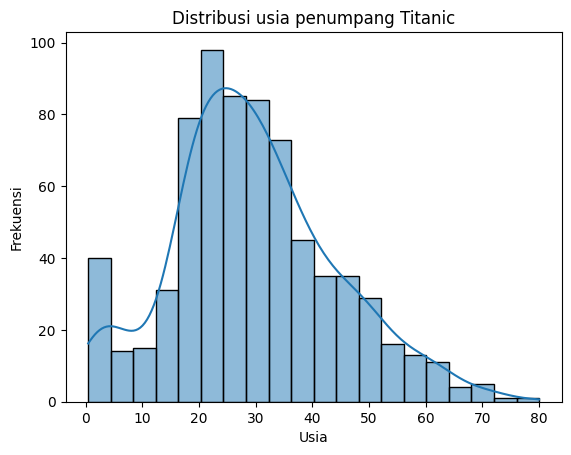

In [16]:
# distribusi usia penumpang

sns.histplot(titanic['age'].dropna(),kde=True)
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.title("Distribusi usia penumpang Titanic")
plt.show()

### Probabilitas data

In [24]:
# contoh 1 : Peluang selamat
total = titanic['survived'].count()

# jumlah yang selamat
survived = titanic['survived'].sum()

# peluang selamat
prob_survived = survived/total
print("Peluang selamatnya penumpang : ", round(prob_survived,2))

Peluang selamatnya penumpang :  0.38


In [21]:
# contoh 2 : peluang selamat berdasarkan jenis kelamin

# peluang penumpang perempuan selamat
prob_pr = titanic[titanic['sex'] == 'female']['survived'].mean()
print('Peluang selamat (pr) :', round(prob_pr,2))

# peluang penumpang pria selamat
prob_lk = titanic[titanic['sex'] == 'male']['survived'].mean()
print('Peluang selamat (lk) :', round(prob_lk,2))

Peluang selamat (pr) : 0.74
Peluang selamat (lk) : 0.19


### Distribusi normal dan binomial

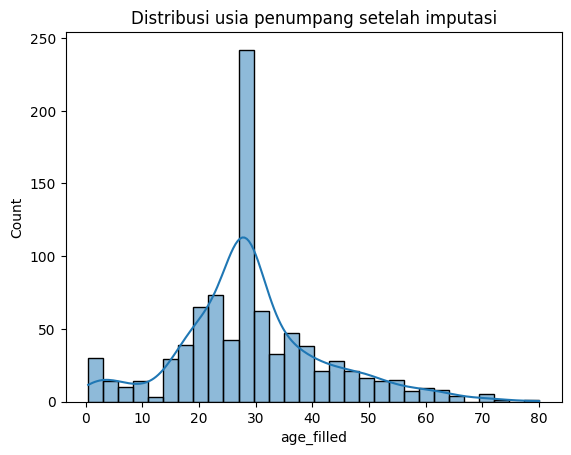

In [ ]:
# distribusi usia penumpang (distribusi normal)

titanic['age_filled'] = titanic['age'].fillna(titanic['age'].median())

sns.histplot(titanic['age_filled'], kde=True)
plt.title("Distribusi usia penumpang setelah imputasi")
plt.show()

In [25]:
# distribusi binomial (10 pwnumpang)

n = 10
p = prob_survived

# peluang 3 orang penumpang selamat

prob_3_surv = binom.pmf(3,n,p)
print("Peluang 3 penumpang selamat : ", round(prob_3_surv,2))

Peluang 3 penumpang selamat :  0.23


In [ ]:
# Analisis survival rate

# isi missing value menggunakan median di 'age'

titanic['age'] = titanic['age'].fillna(titanic['age'].median())
print(titanic.isnull().sum())

# hapus missing value dari "embarked"
titanic.dropna()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_filled       0
dtype: int64


In [34]:
print(titanic.groupby('pclass')['age'].mean())

#STD harga tiket per class
print(titanic.groupby('pclass')['fare'].std())

pclass
1    36.812130
2    29.765380
3    25.932627
Name: age, dtype: float64
pclass
1    78.380373
2    13.417399
3    11.778142
Name: fare, dtype: float64


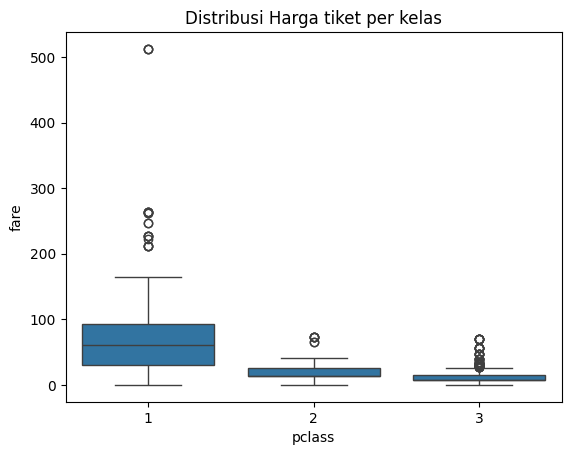

In [32]:
# boxplot harga tiket per class

sns.boxplot(x='pclass', y ='fare', data = titanic)
plt.title("Distribusi Harga tiket per kelas")
plt.show()

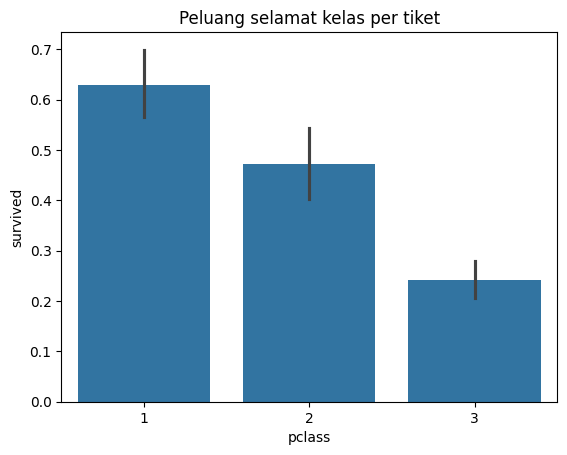

In [37]:
# survival rate berdasarkan kelas tiket

sns.barplot(x='pclass', y = 'survived', data=titanic)
plt.title('Peluang selamat kelas per tiket')
plt.show()

In [42]:
# peluang minimal 5 dari 10 penumpang kelas 1 selamat > 0.6

prob_class1 = titanic[titanic['pclass'] == 1]['survived'].mean()
prob_class1

prob = 1- binom.cdf(4,10,prob_class1)
print("Peluang >= 5 selamat (kelas 1)", round(prob,2))

Peluang >= 5 selamat (kelas 1) 0.88


### Latihan
1. Hitung peluang selamat untuk penumpang di bawah 30 tahun
2. Visualisasi distribusi usia penumpang yang selamat vs tidak selamat

In [44]:
# Peluang selamat penumpang di bawah 30

prob_usia = titanic[titanic['age'] < 30]['survived'].mean()
print('Peluang penumpang selamat di bawah 30:', round(prob_usia,2))

Peluang penumpang selamat di bawah 30: 0.37


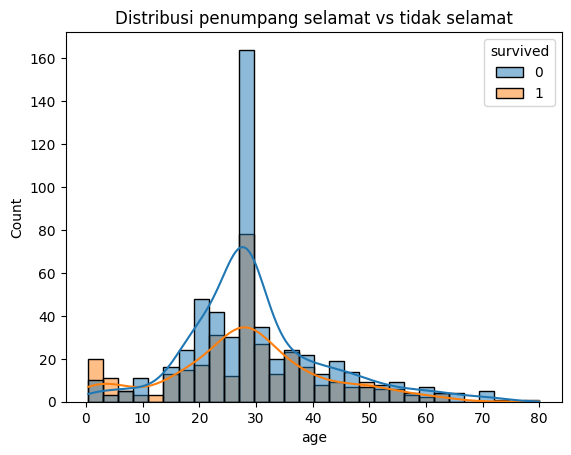

In [47]:
# visualisasi usia penumpang yang selamat vs tidak selamat

sns.histplot(data = titanic, x='age', hue='survived', kde=True)
plt.title("Distribusi penumpang selamat vs tidak selamat")
plt.show()